# All Important libraries and Module

In [28]:
import zipfile
import os
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg


In [29]:
# Force Keras 2 (old stable Keras that works perfectly with tf.keras)
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["TF_USE_LEGACY_KERAS"] = "1"   # यह line सबसे important है !!

In [30]:
import os
print(os.listdir("/kaggle/input/trainadata"))


['test', 'train']


**Extracting dataset**

In [31]:
v = "/kaggle/input/trainadata"
# storing our training dataset
# in v variable

In [32]:
import os, random

v = "/kaggle/input/trainadata/train"
normal_images = random.sample(os.listdir(os.path.join(v, "normal")), 2)
opacity_images = random.sample(os.listdir(os.path.join(v, "opacity")), 2)

print("Normal:", normal_images)
print("Opacity:", opacity_images)


Normal: ['IM-0652-0001.jpeg', 'NORMAL2-IM-0383-0001.jpeg']
Opacity: ['person1345_bacteria_3424.jpeg', 'person1155_virus_1934.jpeg']


In [33]:
v

'/kaggle/input/trainadata/train'

**Lung Vision Visualization**

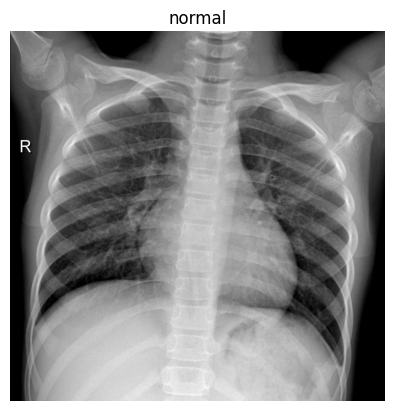

In [34]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
N = "/kaggle/input/trainadata/train/normal"

for i in random.sample(os.listdir(N), 1):
    plt.imshow(mpimg.imread(os.path.join(N, i)), cmap='gray')
    plt.title("normal")
    plt.axis('off')
    plt.show()

# by this  images we can clearly see that unhealthy or they  Pneumonia
# effected lung is more whitish than  normal lungs
# its  because opacity lungs may contain fluids ...
# while normal lungs is filled with  airs (oxygen and carbon dioxides)


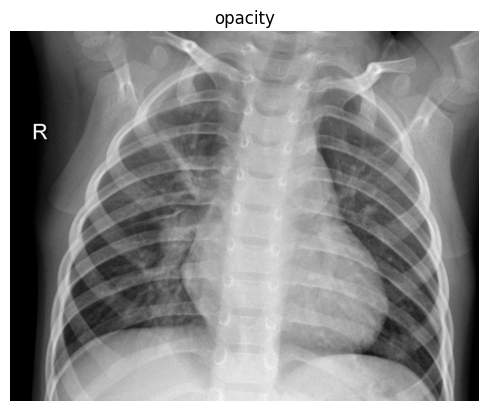

In [35]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg

O = "/kaggle/input/trainadata/train/opacity"

for i in random.sample(os.listdir(O), 1):
    plt.imshow(mpimg.imread(os.path.join(O, i)), cmap='gray')
    plt.title("opacity")
    plt.axis('off')
    plt.show()


**Shape**

In [36]:
# import os

normal_count = len(os.listdir("/kaggle/input/trainadata/train/normal"))
opacity_count = len(os.listdir("/kaggle/input/trainadata/train/opacity"))

print("Normal images:", normal_count)
print("Opacity images:", opacity_count)
# opacity_count
# normal_count , opacity_count



Normal images: 1082
Opacity images: 3110



**Making Folders for training and validations**

In [37]:

import os # making folder and manages 
import shutil # manupulation in folders like copy ,
              # move , delete
from sklearn.model_selection import train_test_split

# storing original paths into variable

In [38]:
# our existing folders
# inside N and O files  names and paths .
v = "/kaggle/input/trainadata/train"        # main dataset
N = "/kaggle/input/trainadata/train/normal" # normal folder
O = "/kaggle/input/trainadata/train/opacity" # opacity folder

# Making Directory  for Validation

In [39]:
base_dir = "/kaggle/working/data"
val_dir = os.path.join(base_dir, "val")
train_ds = "/kaggle/input/trainadata/train"
#  we are making validation directory 
# inside kaggle base directory 


# Making 2 folders inside validation directory

In [40]:

# making  2 folders inside val directory one is for 
# normal and other one is for opacity 
# in order to keep splitted images into validation
# for training purpose .



#  this is for normal folder
os.makedirs(f"{val_dir}/normal", exist_ok=True)

# this is for opacity folder 
os.makedirs(f"{val_dir}/opacity", exist_ok=True)

# Splitting and copying  files from train into validation

In [41]:
import os
import shutil
from sklearn.model_selection import train_test_split

# --- Normal images ---
normal_images = os.listdir(N)
_, val_n = train_test_split(normal_images, test_size=0.2, random_state=42)  # 20% for validation

for img in val_n:
    shutil.copy(os.path.join(N, img), os.path.join(val_dir, "normal"))



# --- Opacity images ---
opacity_images = os.listdir(O)
_, val_o = train_test_split(opacity_images, test_size=0.2, random_state=42)  # 20% for validation

for img in val_o:
    shutil.copy(os.path.join(O, img), os.path.join(val_dir, "opacity"))


**split output**

In [42]:
# print("Train normal:", len(os.listdir(f"{train_dir}/normal")))
# print("Train opacity:", len(os.listdir(f"{train_dir}/opacity")))
print("Val normal:", len(os.listdir(f"{val_dir}/normal")))
print("Val opacity:", len(os.listdir(f"{val_dir}/opacity")))


Val normal: 217
Val opacity: 622


**Loading , Resizing and Assinging Batch Size**

In [43]:
import tensorflow as tf

# Generators / Data Argumentation 

In [44]:
#   Defining Image Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
)


**Training Generator**

In [45]:


# Training generator
train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/trainadata/train",
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = True
)



Found 4192 images belonging to 2 classes.


**Validation Generator**

In [46]:
# Validation generator
val_generator = train_datagen.flow_from_directory(
    "/kaggle/working/data/val",
    target_size=(224,224),
    batch_size= 16 ,
    class_mode='categorical',
    shuffle=False
)



Found 839 images belonging to 2 classes.


# CNN Architecture

In [47]:
# customized convolution architecture

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(                                                  2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')   # 2 classes
])


# Model Compilation

In [48]:
model.compile(
    loss='categorical_crossentropy',     # 2 classes => categorical
    optimizer='adam',
    metrics=['accuracy']
)
    # optimizer='adam', its tell how  weight will
    # be update if there is loss or error while training
    # softmax gives the output of prediction ..after compliation
    # come into picture ..it review the prediction and updates the
    # weight in order to increase the  accuracy.

# Fitting The Model

In [49]:

# adding auguments in model fit 
history = model.fit(
    train_generator,         # augmented training images
    validation_data=val_generator,  # validation images
    epochs=20 
)


Epoch 1/20
262/262 [==============================] - 85s 322ms/step - loss: 0.5070 - accuracy: 0.8101 - val_loss: 0.2872 - val_accuracy: 0.8796
Epoch 2/20
262/262 [==============================] - 87s 331ms/step - loss: 0.2896 - accuracy: 0.8755 - val_loss: 0.3444 - val_accuracy: 0.8439
Epoch 3/20
262/262 [==============================] - 84s 322ms/step - loss: 0.2761 - accuracy: 0.8783 - val_loss: 0.3233 - val_accuracy: 0.8534
Epoch 4/20
262/262 [==============================] - 84s 321ms/step - loss: 0.2411 - accuracy: 0.9003 - val_loss: 0.2265 - val_accuracy: 0.9082
Epoch 5/20
262/262 [==============================] - 84s 319ms/step - loss: 0.2314 - accuracy: 0.9058 - val_loss: 0.2325 - val_accuracy: 0.8999
Epoch 6/20
262/262 [==============================] - 83s 318ms/step - loss: 0.2133 - accuracy: 0.9144 - val_loss: 0.2419 - val_accuracy: 0.8987
Epoch 7/20
262/262 [==============================] - 83s 318ms/step - loss: 0.2176 - accuracy: 0.9101 - val_loss: 0.1958 - val_ac

# Predicting through test images

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np

# our image path
img_path = "/kaggle/input/person/person1_virus_7.jpeg"

# Image load + resize + normalize
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Prediction
pred = model.predict(img_array)
# print("Softmax probabilities:", pred)
print("Predicted class is :", np.argmax(pred))



# here we have given opacity image of lungs
# and predicted it right opacity is labelled as 1

1/1 [==============================] - 0s 55ms/step
Predicted class is : 1


In [51]:
import os, random

test_ds = "/kaggle/input/trainadata/test"
normal_images = random.sample(os.listdir(os.path.join(test_ds , "normal")), 2)
opacity_images = random.sample(os.listdir(os.path.join(test_ds , "opacity")), 2)

print("Normal:", normal_images)
print("Opacity:", opacity_images)

Normal: ['NORMAL2-IM-0370-0001.jpeg', 'NORMAL2-IM-0311-0001.jpeg']
Opacity: ['person159_bacteria_747.jpeg', 'person38_virus_84.jpeg']


# Processing Test Images For Accuracy 

In [52]:
import tensorflow as tf

test_ds_path = "/kaggle/input/trainadata/test" 

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_ds_path,
    shuffle=False,
    image_size=(224,224),
    batch_size=1
)

class_names = test_ds.class_names
print("Classes:", class_names)


Found 624 files belonging to 2 classes.
Classes: ['normal', 'opacity']


# Model evaluation / final prediction 

In [53]:
import numpy as np

# here prediction takes place of all test images
preds = model.predict(test_ds)               # shape: (num_images, num_classes)
pred_classes = np.argmax(preds, axis=1)      # predicted class for each image

# 2. all actual labels
true_classes = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# 3. computing accuracy here 
accuracy = np.mean(pred_classes == true_classes) * 100

print(f"Accuracy: {accuracy:.2f}%")


624/624 [==============================] - 2s 3ms/step
Accuracy: 73.24%


# tunning

In [54]:
# increase  more complex layers
# adding data argumenation
# adding dropout layers
# adjusting learning rate
# if use pretrained mdel like resent v50 
# or transfer learning